In [1]:
#! /usr/bin/env python
# Test photometry
# Simple plots eg. colour-colour
# Match and compare deep data to wide, per galaxy



#!jupyter nbconvert --to script TestPhotometry_deep.ipynb


from __future__ import print_function
import os
import numpy as np
#from read_psf_cats import read_data, band_combinations
import fitsio
import treecorr
import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt
from astropy.io import fits
import h5py as h
from astropy.table import Table,join
from astropy.table import Table
import esutil as eu
import fitsio
from mpl_toolkits.axes_grid1 import make_axes_locatable

### Testing consistency of the 3 SN fields 
import matplotlib.colors as mcolors
import numpy as np

from astropy.coordinates import SkyCoord
from astropy import units as u

## CHECK THE SFD FILE - LOOKS NORMAL

<Figure size 432x288 with 0 Axes>

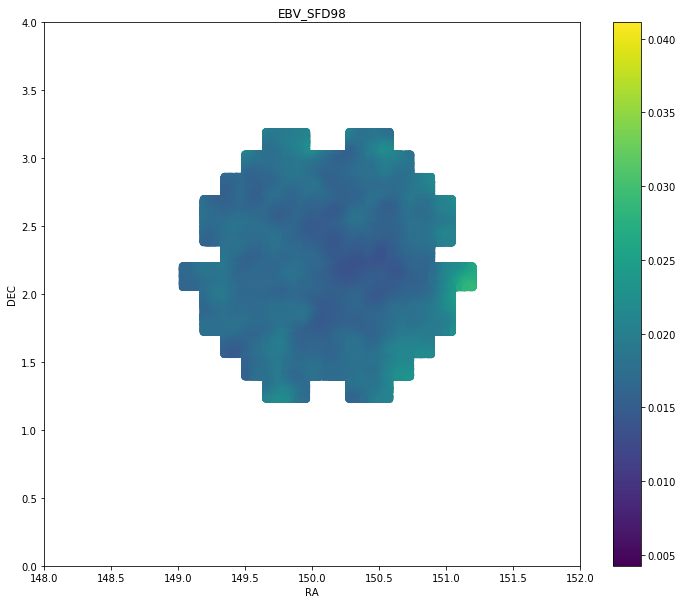

In [34]:


file='/global/cscratch1/sd/aamon/DEEP/FromWill/DES_Y3_GOLD_SN_cosmos_SFD_24Apr20.fits'
desfile = fits.open(file)
sfd=Table(desfile[1].data)
sfd.dtype

plt.figure()
fig, ax = plt.subplots(figsize=(12,10))
plt.scatter(sfd['ALPHAWIN_J2000'],sfd['DELTAWIN_J2000'],c=sfd['EBV_SFD98'])
plt.xlabel('RA')
plt.ylim(0,4)
plt.xlim(148,152)
#plt.yscale('log')
plt.colorbar()
plt.title('EBV_SFD98')
plt.ylabel('DEC')
plt.show()

In [2]:
#OLD FILES - HERE FOR COMPARISON - JUST GO TO NEXT CELL

deep_fields_files = ['/global/cscratch1/sd/aamon/DEEP/MOFcats/run-ugriz-mof02_extcorr.fits',
                     '/global/project/projectdirs/des/y3-image-sims/run-fmof-dv02_extcorr.fits',
                     '/global/project/projectdirs/des/y3-image-sims/run-fmof-dv02.fits']

# read in DES file
desfile = fits.open(deep_fields_files[0])
snc=Table(desfile[1].data)


data = fitsio.read(deep_fields_files[0])
print(data['tilename'])
ind = eu.numpy_util.strmatch(data['tilename'], 'COSMOS*')
cosmos=snc[ind]

print('raw length cosmos :', len(cosmos))
cosmos_nomask=cosmos[cosmos['flags']==0]
print("num deep galaxies post flags=0:",len(cosmos_nomask))
cosmos=cosmos_nomask[cosmos_nomask['mask_flags']==0]
print("num deep galaxies post mask_flags=0:",len(cosmos))

import pandas as pd 
simfile = fits.open(deep_fields_files[1])
snc2=Table(desfile[1].data)
print(len(snc2))


tilename=pd.DataFrame(snc2['tilename'])
ind=tilename['tilename'].str.contains("COSMOS")
ind=ind.to_numpy()
sim=snc2[ind]
print('raw length SIM cosmos :', len(sim))
sim=sim[sim['flags']==0]
print("num SIM galaxies post flags=0:",len(sim))


['COSMOS_C01' 'COSMOS_C01' 'COSMOS_C01' ... 'SN-E2_C60' 'SN-E2_C60'
 'SN-E2_C60']
raw length cosmos : 920727
num deep galaxies post flags=0: 895510
num deep galaxies post mask_flags=0: 709987
2826988
raw length SIM cosmos : 920727
num SIM galaxies post flags=0: 895510


In [28]:
deep_fields_files = ['/global/cscratch1/sd/aamon/DEEP/FromWill/run-ugriz-mof02_extcorr_24Apr20.fits',
                     '/global/cscratch1/sd/aamon/DEEP/FromWill/run-fmof-dv02_extcorr_24Apr20.fits',
                     '/global/cscratch1/sd/aamon/DEEP/MOFcats/COSMOS/run-fmof-dv02.fits',
                     '/global/project/projectdirs/des/y3-image-sims/run-fmof-dv02_extcorr.fits']

# read in DES file
desfile = fits.open(deep_fields_files[0])
snc=Table(desfile[1].data)

data = fitsio.read(deep_fields_files[0])
ind = eu.numpy_util.strmatch(data['tilename'], 'COSMOS*')
cosmos=snc[ind]
print('raw length cosmos :', len(cosmos))
cosmos_nomask=cosmos[cosmos['flags']==0]
print("num deep galaxies post flags=0:",len(cosmos_nomask))
cosmos=cosmos_nomask[cosmos_nomask['mask_flags']==0]
print("num deep galaxies post mask_flags=0:",len(cosmos))

raw length cosmos : 920727
num deep galaxies post flags=0: 895510
num deep galaxies post mask_flags=0: 709987


In [31]:
import pandas as pd 
simfile = fits.open(deep_fields_files[1])
snc2=Table(simfile[1].data)
print(len(snc2))

sim=snc2 #[ind]
print('raw length SIM cosmos :', len(sim))
sim=sim[sim['flags']==0]
print("num SIM galaxies post flags=0:",len(sim))


imfile = fits.open(deep_fields_files[2])
snc3=Table(desfile[1].data)
tilename=pd.DataFrame(snc3['tilename'])
ind=tilename['tilename'].str.contains("COSMOS")
ind=ind.to_numpy()
simold=snc3[ind]
print('raw length SIMold cosmos :', len(simold))
simold=simold[simold['flags']==0]
print("num SIMold galaxies post flags=0:",len(simold))


347296
raw length SIM cosmos : 347296
num SIM galaxies post flags=0: 331707
raw length SIMold cosmos : 920727
num SIMold galaxies post flags=0: 895510


## WHY IS THE CORRECTED FILE SO SMALL?

<Figure size 432x288 with 0 Axes>

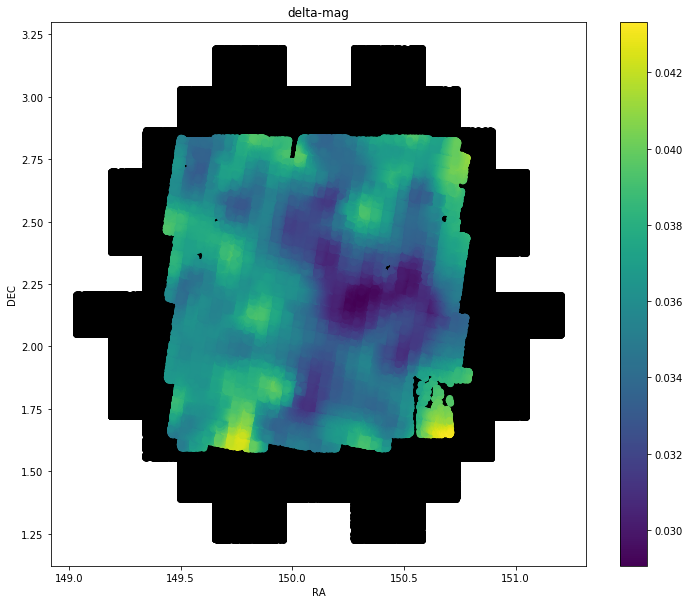

In [33]:
plt.figure()
fig, ax = plt.subplots(figsize=(12,10))
plt.scatter(simold['ra'],simold['dec'],c='black')
plt.scatter(sim['ra'],sim['dec'],c=(sim['bdf_mag'][:,2]-sim['bdf_mag_dered'][:,2]))

plt.xlabel('RA')
plt.title('delta-mag')
plt.ylabel('DEC')
plt.colorbar()


<Figure size 432x288 with 0 Axes>

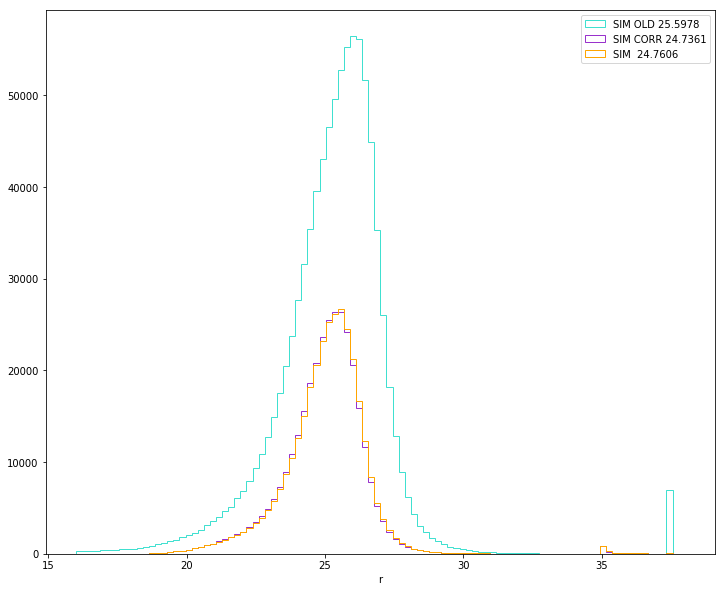

In [36]:

#CHECK DE_RED LOOKS OK COMPARED TO OLD FILE - NON CORRECTED IN NEW FILE IS THE SAME AS THE OLD FILE
plt.figure()
fig, ax = plt.subplots(figsize=(12,10))
plt.hist(simold['bdf_mag'][:,2],100,color='turquoise',range=(16,38),histtype='step',label='SIM OLD %.7s' %  (np.median(simold['bdf_mag'])))
plt.hist(sim['bdf_mag_dered'][:,2],100,color='darkorchid',range=(16,38),histtype='step',label='SIM CORR %.7s' %  (np.median(sim['bdf_mag_dered'])))#plt.hist(deep_data[deep_data['FIELD']=='X3']['BDF_MAG_J'],100,color='blue',alpha=0.5,label='X3 %s' %len(x3))
plt.hist(sim['bdf_mag'][:,2],100,color='orange',range=(16,38),histtype='step',label='SIM  %.7s' %  (np.median(sim['bdf_mag'])))#plt.hist(deep_data[deep_data['FIELD']=='X3']['BDF_MAG_J'],100,color='blue',alpha=0.5,label='X3 %s' %len(x3))

plt.xlabel('r')

#plt.yscale('log')
plt.legend()

## OTHERWISE THE CORRECTION LOOKS OK


<Figure size 432x288 with 0 Axes>

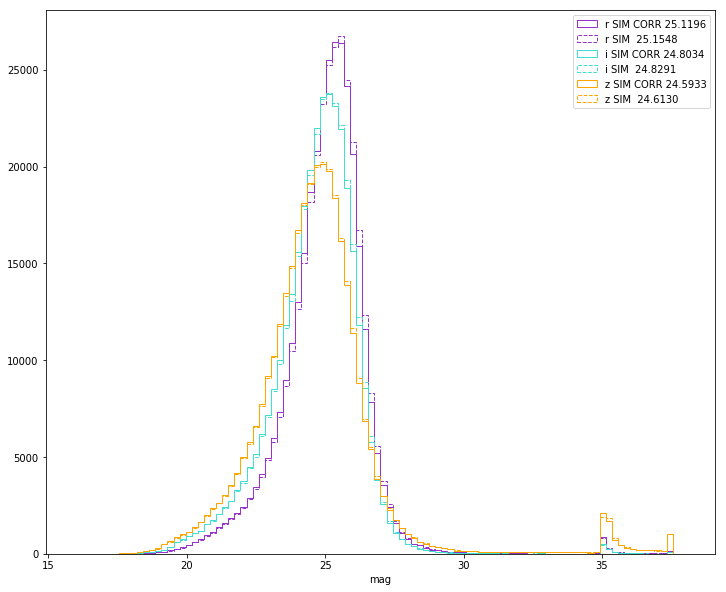

In [37]:
#MAG HISTS WITH AND WITHOUT CORRECTION FOR RIZ 
plt.figure()
fig, ax = plt.subplots(figsize=(12,10))
plt.hist(sim['bdf_mag_dered'][:,2],100,color='darkorchid',range=(16,38),histtype='step',label='r SIM CORR %.7s' %  (np.median(sim['bdf_mag_dered'][:,2])))#plt.hist(deep_data[deep_data['FIELD']=='X3']['BDF_MAG_J'],100,color='blue',alpha=0.5,label='X3 %s' %len(x3))
plt.hist(sim['bdf_mag'][:,2],100,linestyle='dashed',color='darkorchid',range=(16,38),histtype='step',label='r SIM  %.7s' %  (np.median(sim['bdf_mag'][:,2])))#plt.hist(deep_data[deep_data['FIELD']=='X3']['BDF_MAG_J'],100,color='blue',alpha=0.5,label='X3 %s' %len(x3))

plt.hist(sim['bdf_mag_dered'][:,3],100,color='turquoise',range=(16,38),histtype='step',label='i SIM CORR %.7s' %  (np.median(sim['bdf_mag_dered'][:,3])))#plt.hist(deep_data[deep_data['FIELD']=='X3']['BDF_MAG_J'],100,color='blue',alpha=0.5,label='X3 %s' %len(x3))
plt.hist(sim['bdf_mag'][:,3],100,linestyle='dashed',color='turquoise',range=(16,38),histtype='step',label='i SIM  %.7s' %  (np.median(sim['bdf_mag'][:,3])))#plt.hist(deep_data[deep_data['FIELD']=='X3']['BDF_MAG_J'],100,color='blue',alpha=0.5,label='X3 %s' %len(x3))

plt.hist(sim['bdf_mag_dered'][:,4],100,color='orange',range=(16,38),histtype='step',label='z SIM CORR %.7s' %  (np.median(sim['bdf_mag_dered'][:,4])))#plt.hist(deep_data[deep_data['FIELD']=='X3']['BDF_MAG_J'],100,color='blue',alpha=0.5,label='X3 %s' %len(x3))
plt.hist(sim['bdf_mag'][:,4],100,linestyle='dashed',color='orange',range=(16,38),histtype='step',label='z SIM  %.7s' %  (np.median(sim['bdf_mag'][:,4])))#plt.hist(deep_data[deep_data['FIELD']=='X3']['BDF_MAG_J'],100,color='blue',alpha=0.5,label='X3 %s' %len(x3))

plt.xlabel('mag')

#plt.yscale('log')
plt.legend()

<Figure size 432x288 with 0 Axes>

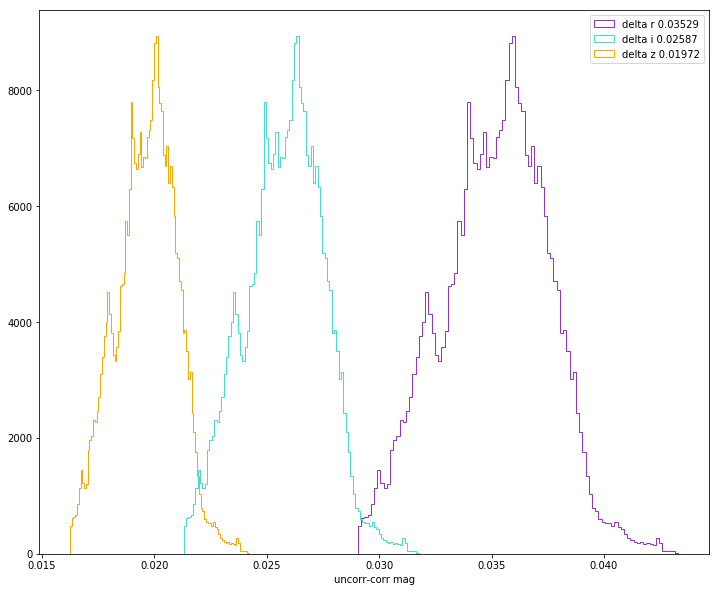

In [38]:
#CHECK DE_RED LOOKS OK
plt.figure()
fig, ax = plt.subplots(figsize=(12,10))
plt.hist(sim['bdf_mag'][:,2]-sim['bdf_mag_dered'][:,2],100,color='darkorchid',histtype='step',label='delta r %.7s' %  (np.median(sim['bdf_mag'][:,2]-sim['bdf_mag_dered'][:,2])))#plt.hist(deep_data[deep_data['FIELD']=='X3']['BDF_MAG_J'],100,color='blue',alpha=0.5,label='X3 %s' %len(x3))
plt.hist(sim['bdf_mag'][:,3]-sim['bdf_mag_dered'][:,3],100,color='turquoise',histtype='step',label='delta i %.7s' %  (np.median(sim['bdf_mag'][:,3]-sim['bdf_mag_dered'][:,3])))#plt.hist(deep_data[deep_data['FIELD']=='X3']['BDF_MAG_J'],100,color='blue',alpha=0.5,label='X3 %s' %len(x3))
plt.hist(sim['bdf_mag'][:,4]-sim['bdf_mag_dered'][:,4],100,color='orange',histtype='step',label='delta z %.7s' %  (np.median(sim['bdf_mag'][:,4]-sim['bdf_mag_dered'][:,4])))#plt.hist(deep_data[deep_data['FIELD']=='X3']['BDF_MAG_J'],100,color='blue',alpha=0.5,label='X3 %s' %len(x3))

plt.xlabel('uncorr-corr mag')
#plt.yscale('log')
plt.legend()

Text(0,0.5,'DEC')

<Figure size 432x288 with 0 Axes>

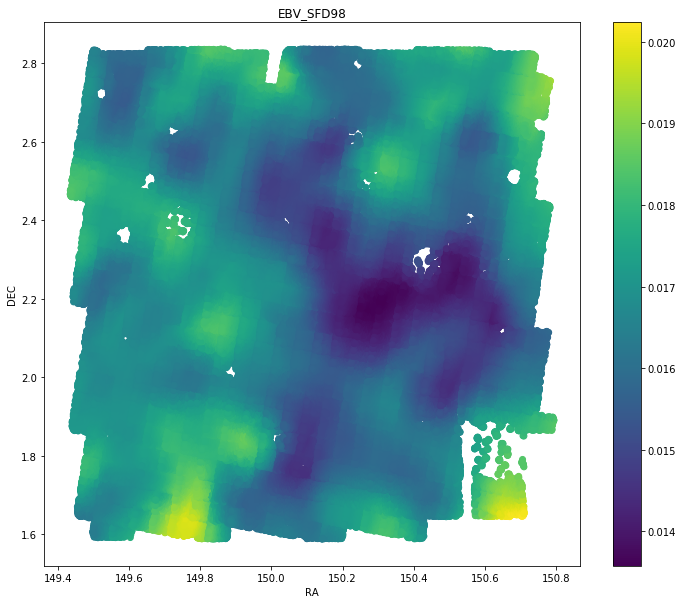

In [9]:
plt.figure()
fig, ax = plt.subplots(figsize=(12,10))
plt.scatter(sim['ra'],sim['dec'],c=sim['EBV_SFD98'])
plt.xlabel('RA')
#plt.yscale('log')
plt.colorbar()
plt.title('EBV_SFD98')
plt.ylabel('DEC')

/global/homes/a/aamon/.conda/envs/som/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<Figure size 432x288 with 0 Axes>

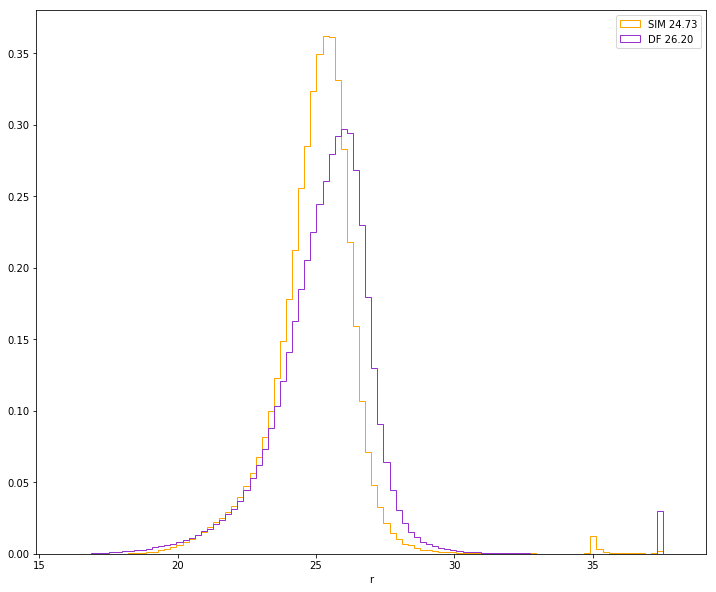

In [11]:
plt.figure()
fig, ax = plt.subplots(figsize=(12,10))
plt.hist(sim['bdf_mag_dered'][:,2],100,color='orange',range=(16,38),histtype='step',label='SIM %.5s' %  (np.median(sim['bdf_mag_dered'])),normed=True)
plt.hist(cosmos['bdf_mag_dered'][:,2],100,color='darkorchid',range=(16,38),histtype='step',label='DF %.5s ' %  (np.median(cosmos['bdf_mag_dered'][:,0])),normed=True)
#plt.hist(deep_data[deep_data['FIELD']=='X3']['BDF_MAG_J'],100,color='blue',alpha=0.5,label='X3 %s' %len(x3))
plt.xlabel('r')

#plt.yscale('log')
plt.legend()